In [34]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [35]:
x_train=np.load("data.npy")
x_train.shape

(200, 2)

<Axes: >

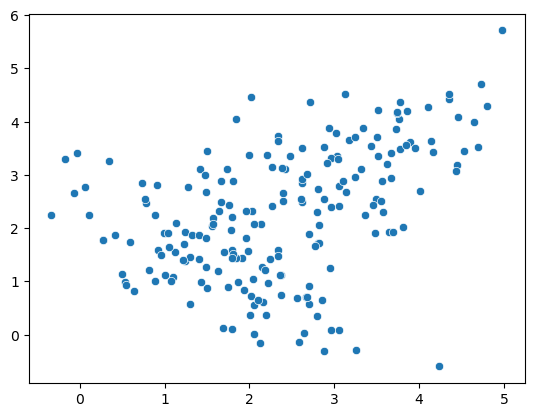

In [36]:
sns.scatterplot(x=x_train[:,0],y=x_train[:,1])

In [37]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [38]:
k=range(2,8)
list_sil=[]
for i in k:
    model=GaussianMixture(n_components=i).fit(x_train)
    labels=model.predict(x_train)
    sil=silhouette_score(x_train,labels,metric="euclidean")
    list_sil.append(sil)

c:\Users\Khang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Khang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Khang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Khang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

<Axes: >

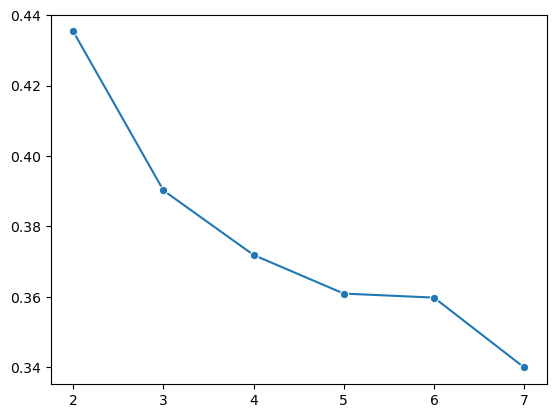

In [39]:
sns.lineplot(x=k,y=list_sil,marker="o")

2 là số cụm tốt nhất

# Build model with k=2

In [40]:
model_G=GaussianMixture(n_components=2).fit(x_train)

c:\Users\Khang\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
model_G.weights_

array([0.48114312, 0.51885688])

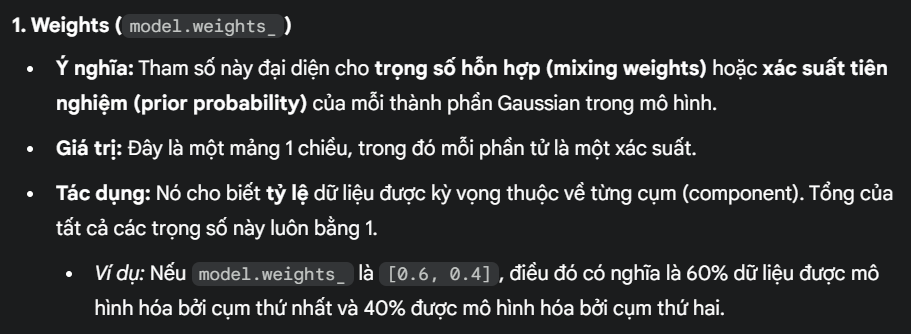

In [42]:
model_G.means_

array([[1.60718016, 1.35251723],
       [3.04641134, 3.10654272]])

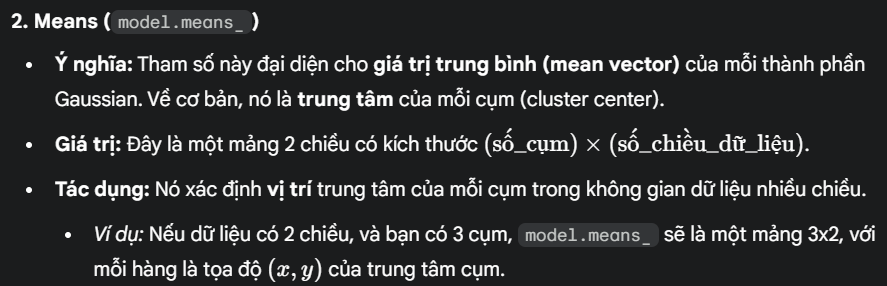

In [43]:
model_G.covariances_

array([[[ 0.74995307, -0.5010097 ],
        [-0.5010097 ,  0.74377694]],

       [[ 0.83656079,  0.37865596],
        [ 0.37865596,  0.72727426]]])

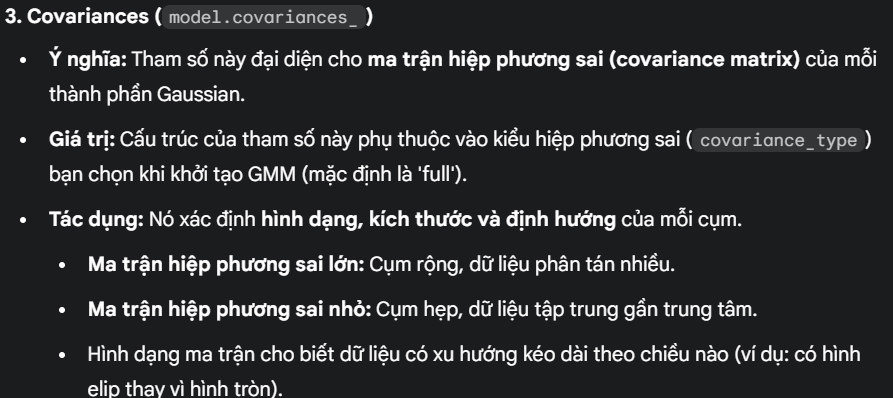
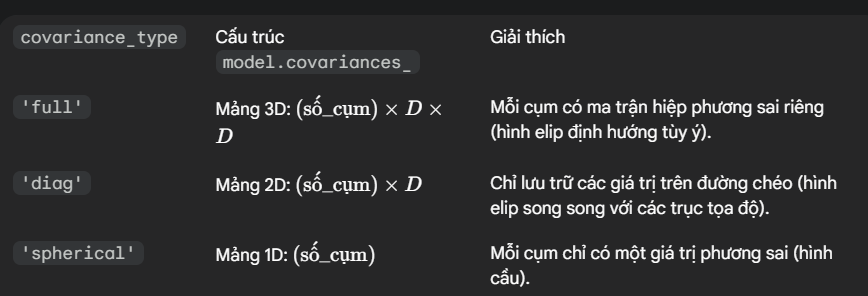

# visualize model

In [44]:
types=model_G.predict(x_train)

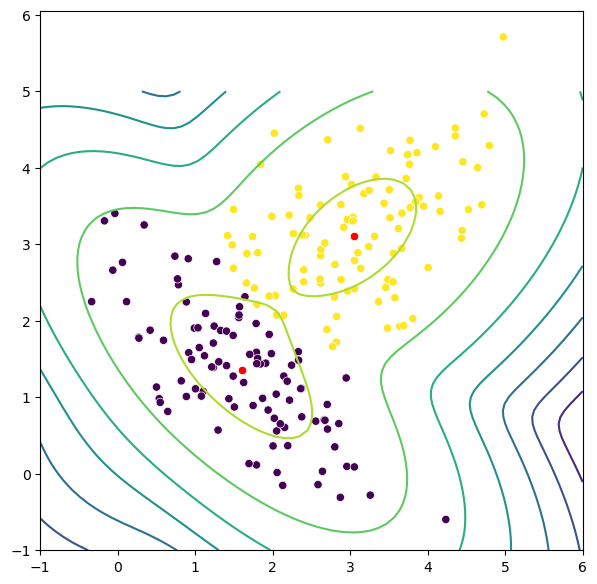

In [53]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=x_train[:,0],y=x_train[:,1],c=types)
# tâm cụm
sns.scatterplot(x=model_G.means_[:,0],y=model_G.means_[:,1],c="red")
# vẽ lưới
X, Y = np.meshgrid(np.linspace(-1, 6, 70), np.linspace(-1, 5, 70))
XX = np.array([X.ravel(), Y.ravel()]).T # ma tran [[x,y]] ~ x_train
Z = model_G.score_samples(XX)
Z = Z.reshape(70, 70)
plt.contour(X, Y, Z)

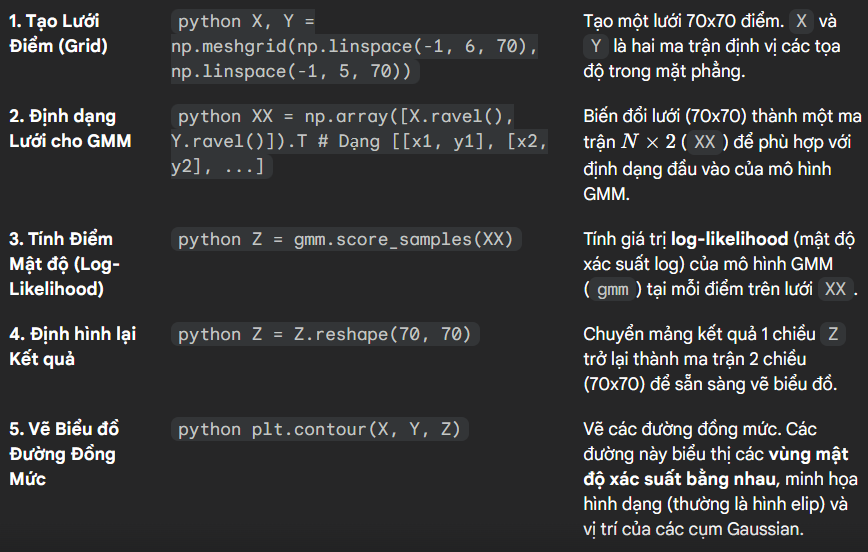